# Biased Coin Flip

Assume the following gamble
- A 55% probability of doubling your money
- A 45% probability of losing

How many times should you take the bet?

According to the EV:

In [1]:
ev = 0.55 * 2 + 0.45 * 0
ev

1.1

Your expected value is always positive. According to economics, you should always take this bet. This is not an accurate statement probabilistically, but is the kind of poor application of probability seen in many economic papers. Most famously, Thomas Piketty's central argument is based on this kind of misunderstanding of ergodicity.

Let's show why using some basic simulations

## Simulation

In [14]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
import scipy.stats as stats

In [15]:
np.random.seed(42)

In [16]:
numberOfPeople = 1000000
numberOfDays = 10

In [35]:
@njit
def doCoinFlip(successProb):
    if np.random.uniform(0.0, 1.0) < successProb:
        return True
    return False

In [18]:
def runPerson(successProb):
    val = 1.0
    for i in range(numberOfDays):
        if doCoinFlip(successProb):
            val *= 2
        else:
            return 0
    return val

In [19]:
def runExperiment(successProb):
    data = []
    for i in range(numberOfPeople):
        data.append(runPerson(successProb))
    return np.array(data)

In [20]:
data55 = runExperiment(0.55)

In [21]:
def doCoinFlip(successProb):
    if numpy.random.uniform() < successProb:
        return True
    return False

If we were to naively take the mean:

In [22]:
data55.mean()

2.642944

This would still look like a good bet. On average, you more than double your money if you take the bet 10 times. But let's look a the histogram

In [23]:
data55[data55<1].size

997419

(array([997419.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   2581.]),
 array([   0. ,  102.4,  204.8,  307.2,  409.6,  512. ,  614.4,  716.8,
         819.2,  921.6, 1024. ]),
 <BarContainer object of 10 artists>)

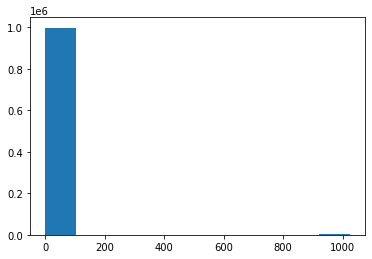

In [24]:
plt.hist(data55)

In [25]:
data55[data55==0].size / data55.size

0.997419

In [26]:
data55.mean()

2.642944

The distribution overwhelmingly shows that you're most likely to lose your money

In [27]:
stats.ttest_1samp(data55, 2)

Ttest_1sampResult(statistic=12.374855980801982, pvalue=3.5966456813276403e-35)

## Better Odds?
 Even with much better odds:

In [36]:
data85 = runExperiment(0.85)

In [37]:
data85.mean()

201.952256

(array([802781.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 197219.]),
 array([   0. ,  102.4,  204.8,  307.2,  409.6,  512. ,  614.4,  716.8,
         819.2,  921.6, 1024. ]),
 <BarContainer object of 10 artists>)

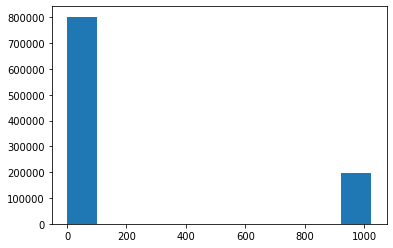

In [38]:
plt.hist(data85)

In [39]:
data85[data85==0].size / data55.size

0.802781